Rename this lab as "Yourlastname_firstinitial_Lab_Webscraping_DataCollection". You need to submit html file.

Sarah Millard "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



# Data Analytics Project Lifecycle

<img src='https://www.tutorialspoint.com/big_data_analytics/images/life_cycle.jpg'>

# Web scraping for Data Collection

**What is web scraping?**

Web scraping is a popular method to collect data from the web. 

This method requires some knowledge of **html** & **xpath**.

When you collect the data from websites, you need to be mindful about the website's terms and conditions. Examples below are developed for educational purpose.

**XPath**

- Xpath is a query language to access specific contents or data on the web page (web scraping)
- Xpath is used to collect data from webpages

**Example**

This is a web page (http://sfbay.craigslist.org/search/npo)

<img src="images/craiglist.gif">

This is the ```html source code``` of the above webpage

<img src="images/craiglist_title.gif">

**Some terms to know for web scraping**

- nodes (or elements): html tags such as div, section, span, a, p, etc.
- attributes: more information included inside html tags, such as class, href, datetime, title, data-id, etc.
- children: the nodes or elements in lower hierarchical levels (e.g., a is a child of span, section is a child of div)
- parent: opposite of children

**Python modules used in this lecture** 

For web scraping, you need to use a python moduel (or package) called **[Request](http://docs.python-requests.org/en/latest/)** to **access HTML file or web page**

Then, **HTML pages need to be processed** using **[lxml](http://lxml.de/)**

Finally, capture data from the target website or webpage 

In [ ]:
# Python packages for web scraping
import requests
from lxml import html

# csv and pandas
import csv
import pandas as pd

# python package for data visualization
%matplotlib inline
import matplotlib.pyplot as plt

# show 1000 rows
pd.set_option('display.max_rows', 1000)

# Example: Craiglist http://sfbay.craigslist.org/search/npo

In [9]:
# visit the webpage and access the web contents
r = requests.get('http://sfbay.craigslist.org/search/npo')
data = html.fromstring(r.text)

# xpath: collect the specific data you're looking for

for i in data.xpath("//div[@class='result-info']"):
    title = i.xpath("h3[@class = 'result-heading']/a/text()")
    url = i.xpath("h3[@class = 'result-heading']/a/@href")
    print(title, url)                    # the output includes []

['Medical Receptionist - HAFC'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-medical-receptionist-hafc/7272156643.html']
['Communications and Development Coordinator'] ['https://sfbay.craigslist.org/nby/npo/d/olema-communications-and-development/7272141706.html']
['Development Coordinator'] ['https://sfbay.craigslist.org/pen/npo/d/palo-alto-development-coordinator/7272069080.html']
['Social Services Manager'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-social-services-manager/7272029326.html']
['RN nurse case manager Team Lead'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-rn-nurse-case-manager/7271978605.html']
['Intake & Assessment Specialist'] ['https://sfbay.craigslist.org/sby/npo/d/santa-clara-intake-assessment-specialist/7271778903.html']
['Cook (Part Time)'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-cook-part-time/7271776569.html']
['Housing Stability Specialist (BL-Spanish)'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-hous

In [11]:
finaldata = []  # create an empty list or basket to save the collected data

for i in data.xpath("//div[@class='result-info']"):
    title = i.xpath("h3[@class = 'result-heading']/a/text()")
    url = i.xpath("h3[@class = 'result-heading']/a/@href")
    print(title, url)
    finaldata.append([title, url])  # to save the collected data

len(finaldata)

['Medical Receptionist - HAFC'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-medical-receptionist-hafc/7272156643.html']
['Communications and Development Coordinator'] ['https://sfbay.craigslist.org/nby/npo/d/olema-communications-and-development/7272141706.html']
['Development Coordinator'] ['https://sfbay.craigslist.org/pen/npo/d/palo-alto-development-coordinator/7272069080.html']
['Social Services Manager'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-social-services-manager/7272029326.html']
['RN nurse case manager Team Lead'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-rn-nurse-case-manager/7271978605.html']
['Intake & Assessment Specialist'] ['https://sfbay.craigslist.org/sby/npo/d/santa-clara-intake-assessment-specialist/7271778903.html']
['Cook (Part Time)'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-cook-part-time/7271776569.html']
['Housing Stability Specialist (BL-Spanish)'] ['https://sfbay.craigslist.org/sfc/npo/d/san-francisco-hous

120

In [12]:
df = pd.DataFrame(finaldata)
df

,0,1
0,[Medical Receptionist - HAFC],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...
1,[Communications and Development Coordinator],[https://sfbay.craigslist.org/nby/npo/d/olema-...
2,[Development Coordinator],[https://sfbay.craigslist.org/pen/npo/d/palo-a...
3,[Social Services Manager],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...
4,[RN nurse case manager Team Lead],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...
5,[Intake & Assessment Specialist],[https://sfbay.craigslist.org/sby/npo/d/santa-...
6,[Cook (Part Time)],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...
7,[Housing Stability Specialist (BL-Spanish)],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...
8,[The Children’s Movement Equity Fellowship Pro...,[https://sfbay.craigslist.org/eby/npo/d/oaklan...
9,[Case Manager (BL-Spanish)],[https://sfbay.craigslist.org/sfc/npo/d/san-fr...


In [13]:
# remove bracket
df[0] = df[0].str[0]
df[1] = df[1].str[0]
df

,0,1
0,Medical Receptionist - HAFC,https://sfbay.craigslist.org/sfc/npo/d/san-fra...
1,Communications and Development Coordinator,https://sfbay.craigslist.org/nby/npo/d/olema-c...
2,Development Coordinator,https://sfbay.craigslist.org/pen/npo/d/palo-al...
3,Social Services Manager,https://sfbay.craigslist.org/sfc/npo/d/san-fra...
4,RN nurse case manager Team Lead,https://sfbay.craigslist.org/sfc/npo/d/san-fra...
5,Intake & Assessment Specialist,https://sfbay.craigslist.org/sby/npo/d/santa-c...
6,Cook (Part Time),https://sfbay.craigslist.org/sfc/npo/d/san-fra...
7,Housing Stability Specialist (BL-Spanish),https://sfbay.craigslist.org/sfc/npo/d/san-fra...
8,The Children’s Movement Equity Fellowship Program,https://sfbay.craigslist.org/eby/npo/d/oakland...
9,Case Manager (BL-Spanish),https://sfbay.craigslist.org/sfc/npo/d/san-fra...


In [16]:
df.to_csv("data/webscraping_craigslist.csv", index=False, encoding='utf-8')

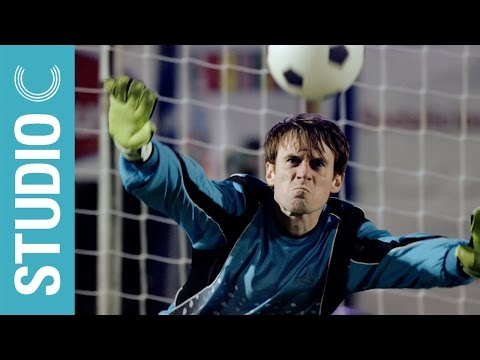

In [15]:
# just a little fun !!! 
from IPython.display import YouTubeVideo
YouTubeVideo('8F9jXYOH2c0')

# Example: Product & Price Information http://econpy.pythonanywhere.com/ex/001.html

In [17]:
# visit the webpage and access the web contents
r = requests.get('http://econpy.pythonanywhere.com/ex/001.html')
data = html.fromstring(r.text)

In [19]:
for i in data.xpath("//div[@title='buyer-info']"):
    buyers = i.xpath("div/text()")
    prices = i.xpath("span/text()")
    print(buyers, prices)

['Carson Busses'] ['$29.95']
['Earl E. Byrd'] ['$8.37']
['Patty Cakes'] ['$15.26']
['Derri Anne Connecticut'] ['$19.25']
['Moe Dess'] ['$19.25']
['Leda Doggslife'] ['$13.99']
['Dan Druff'] ['$31.57']
['Al Fresco'] ['$8.49']
['Ido Hoe'] ['$14.47']
['Howie Kisses'] ['$15.86']
['Len Lease'] ['$11.11']
['Phil Meup'] ['$15.98']
['Ira Pent'] ['$16.27']
['Ben D. Rules'] ['$7.50']
['Ave Sectomy'] ['$50.85']
['Gary Shattire'] ['$14.26']
['Bobbi Soks'] ['$5.68']
['Sheila Takya'] ['$15.00']
['Rose Tattoo'] ['$114.07']
['Moe Tell'] ['$10.09']


In [20]:
finaldata = []

for i in data.xpath("//div[@title='buyer-info']"):
    buyers = i.xpath("div/text()")
    prices = i.xpath("span/text()")
    finaldata.append([buyers, prices])

# changing the data more like Excel format
df = pd.DataFrame(finaldata)

# remove bracket
df[0] = df[0].str[0]
df[1] = df[1].str[0]

df.to_csv("data/webscraping_salesdata.csv", index=False, encoding='utf-8')

### Simple data analysis

In [21]:
#view first five rows
df.head()

,0,1
0,Carson Busses,$29.95
1,Earl E. Byrd,$8.37
2,Patty Cakes,$15.26
3,Derri Anne Connecticut,$19.25
4,Moe Dess,$19.25


In [23]:
#find out the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


#### Data types in Python

There are different **data types**:
    
1. object : string (e.g., last name, non-numeric values)
2. int : integer values
3. float : decimal values

In [24]:
#remove dollar sign
df[1] = df[1].str.replace('$', '')
df.head()

,0,1
0,Carson Busses,29.95
1,Earl E. Byrd,8.37
2,Patty Cakes,15.26
3,Derri Anne Connecticut,19.25
4,Moe Dess,19.25


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [26]:
#convert object to number
df[1] = pd.to_numeric(df[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     object 
 1   1       20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


0 and 1 are the default column names. You can change the column names.

In [27]:
df=df.rename(columns={0: 'Buyers', 1: 'Prices'})
df.head()

,Buyers,Prices
0,Carson Busses,29.95
1,Earl E. Byrd,8.37
2,Patty Cakes,15.26
3,Derri Anne Connecticut,19.25
4,Moe Dess,19.25


In [28]:
# summary statistics
df.describe()

,Prices
count,20.000000
mean,21.863500
std,24.024161
min,5.680000
25%,10.855000
50%,15.130000
75%,19.250000
max,114.070000


In [29]:
# simple descriptive statistics
df['Tax_Amounts'] = df['Prices'] * 0.0825
df.head()

,Buyers,Prices,Tax_Amounts
0,Carson Busses,29.95,2.470875
1,Earl E. Byrd,8.37,0.690525
2,Patty Cakes,15.26,1.258950
3,Derri Anne Connecticut,19.25,1.588125
4,Moe Dess,19.25,1.588125


In [30]:
df['Totals'] = df['Prices'] + df['Tax_Amounts']
df.head()

,Buyers,Prices,Tax_Amounts,Totals
0,Carson Busses,29.95,2.470875,32.420875
1,Earl E. Byrd,8.37,0.690525,9.060525
2,Patty Cakes,15.26,1.258950,16.518950
3,Derri Anne Connecticut,19.25,1.588125,20.838125
4,Moe Dess,19.25,1.588125,20.838125


In [31]:
df.describe()

,Prices,Tax_Amounts,Totals
count,20.000000,20.000000,20.000000
mean,21.863500,1.803739,23.667239
std,24.024161,1.981993,26.006154
min,5.680000,0.468600,6.148600
25%,10.855000,0.895538,11.750538
50%,15.130000,1.248225,16.378225
75%,19.250000,1.588125,20.838125
max,114.070000,9.410775,123.480775


In [2]:
# who paid most?
df.sort_values('Prices', ascending=False)

NameError: name 'df' is not defined

In [33]:
# who paid least?
df.sort_values('Prices', ascending=True)

,Buyers,Prices,Tax_Amounts,Totals
16,Bobbi Soks,5.68,0.468600,6.148600
13,Ben D. Rules,7.50,0.618750,8.118750
1,Earl E. Byrd,8.37,0.690525,9.060525
7,Al Fresco,8.49,0.700425,9.190425
19,Moe Tell,10.09,0.832425,10.922425
10,Len Lease,11.11,0.916575,12.026575
5,Leda Doggslife,13.99,1.154175,15.144175
15,Gary Shattire,14.26,1.176450,15.436450
8,Ido Hoe,14.47,1.193775,15.663775
17,Sheila Takya,15.00,1.237500,16.237500


# Example: Current NBA Team Rosters https://en.wikipedia.org/wiki/List_of_current_NBA_team_rosters

In [36]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_current_NBA_team_rosters')
data = html.fromstring(r.text)

In [38]:
finaldata = []

for i in data.xpath("//tr"):
    name = i.xpath("td[3]/a/text()")
    school = i.xpath("td[7]/a/text() | td[7]/text()")
    print(name, school)

[] []
[] []
[] []
[] []
['Brown, Jaylen'] ['California', '\n']
['Edwards, Carsen'] ['Purdue', '\n']
['Fall, Tacko'] ['Central Florida', '\n']
['Green, Javonte'] ['Radford', '\n']
['Langford, Romeo'] ['Indiana', '\n']
['Nesmith, Aaron'] ['Vanderbilt', '\n']
['Ojeleye, Semi'] ['SMU', '\n']
['Pritchard, Payton'] ['Oregon', '\n']
['Smart, Marcus'] ['Oklahoma State', '\n']
['Tatum, Jayson'] ['Duke', '\n']
['Teague, Jeff'] ['Wake Forest', '\n']
['Theis, Daniel'] ['Germany', '\n']
['Thompson, Tristan'] ['Texas', '\n']
['Walker, Kemba'] ['Connecticut', '\n']
['Waters, Tremont'] ['LSU', '\n']
['Williams, Grant'] ['Tennessee', '\n']
['Williams, Robert'] ['Texas A&M', '\n']
[] []
[] []
[] []
[] []
['Brown, Bruce'] ['Miami (FL)', '\n']
['Chiozza, Chris'] ['Florida', '\n']
['Claxton, Nicolas'] ['Georgia', '\n']
['Dinwiddie, Spencer'] ['Colorado', '\n']
['Durant, Kevin'] ['Texas', '\n']
['Green, Jeff'] ['Georgetown', '\n']
['Harden, James'] ['Arizona State', '\n']
['Harris, Joe'] ['Virginia', '\n']


['Miller, Darius'] ['Kentucky', '\n']
['Muscala, Mike'] ['Bucknell', '\n']
['Pokuševski, Aleksej'] ['Serbia', '\n']
['Roby, Isaiah'] ['Nebraska', '\n']
['Williams, Kenrich'] ['TCU', '\n']
[] []
[] []
[] []
[] []
['Anthony, Carmelo'] ['Syracuse', '\n']
['Blevins, Keljin'] ['Montana State', '\n']
['Collins, Zach'] ['Gonzaga', '\n']
['Covington, Robert'] ['Tennessee State', '\n']
['Elleby, C. J.'] ['Washington State', '\n']
['Giles, Harry'] ['Duke', '\n']
['Hood, Rodney'] ['Duke', '\n']
['Jones, Derrick'] ['UNLV', '\n']
['Kanter, Enes'] ['Turkey', '\n']
['Lillard, Damian'] ['Weber State', '\n']
['Little, Nassir'] ['North Carolina', '\n']
['McCollum, CJ'] ['Lehigh', '\n']
['Nurkić, Jusuf'] ['Bosnia and Herzegovina', '\n']
['Simons, Anfernee'] ['IMG Academy (FL)', '\n']
['Trent, Gary'] ['Duke', '\n']
[] []
[] []
[] []
[] []
['Azubuike, Udoka'] ['Kansas', '\n']
['Bogdanović, Bojan'] ['Croatia', '\n']
['Brantley, Jarrell'] ['College of Charleston', '\n']
['Clarkson, Jordan'] ['Missouri', '\n'

There is no "from" information for Ferguson, Terrance.

['Ferguson, Terrance'] []

Ferguson, Terrance is from Advanced Prep International (TX). This information is in td[7]/text(), not in td[7]/a/text()

In [39]:
finaldata = []

for i in data.xpath("//tr"):
    name = i.xpath("td[3]/a/text()")
    school = i.xpath("td[7]/a/text() | td[7]/text()")                      # vertical for multiple xpaths
    print(name, school)
    finaldata.append([name, school])

[] []
[] []
[] []
[] []
['Brown, Jaylen'] ['California', '\n']
['Edwards, Carsen'] ['Purdue', '\n']
['Fall, Tacko'] ['Central Florida', '\n']
['Green, Javonte'] ['Radford', '\n']
['Langford, Romeo'] ['Indiana', '\n']
['Nesmith, Aaron'] ['Vanderbilt', '\n']
['Ojeleye, Semi'] ['SMU', '\n']
['Pritchard, Payton'] ['Oregon', '\n']
['Smart, Marcus'] ['Oklahoma State', '\n']
['Tatum, Jayson'] ['Duke', '\n']
['Teague, Jeff'] ['Wake Forest', '\n']
['Theis, Daniel'] ['Germany', '\n']
['Thompson, Tristan'] ['Texas', '\n']
['Walker, Kemba'] ['Connecticut', '\n']
['Waters, Tremont'] ['LSU', '\n']
['Williams, Grant'] ['Tennessee', '\n']
['Williams, Robert'] ['Texas A&M', '\n']
[] []
[] []
[] []
[] []
['Brown, Bruce'] ['Miami (FL)', '\n']
['Chiozza, Chris'] ['Florida', '\n']
['Claxton, Nicolas'] ['Georgia', '\n']
['Dinwiddie, Spencer'] ['Colorado', '\n']
['Durant, Kevin'] ['Texas', '\n']
['Green, Jeff'] ['Georgetown', '\n']
['Harden, James'] ['Arizona State', '\n']
['Harris, Joe'] ['Virginia', '\n']


['Wanamaker, Brad'] ['Pittsburgh', '\n']
['Wiggins, Andrew'] ['Kansas', '\n']
['Wiseman, James'] ['Memphis', '\n']
[] []
[] []
[] []
[] []
['Batum, Nicolas'] ['France', '\n']
['Beverley, Patrick'] ['Arkansas', '\n']
['Coffey, Amir'] ['Minnesota', '\n']
['George, Paul'] ['Fresno State', '\n']
['Ibaka, Serge'] ['Republic of the Congo', '\n']
['Jackson, Reggie'] ['Boston College', '\n']
['Kabengele, Mfiondu'] ['Florida State', '\n']
['Kennard, Luke'] ['Duke', '\n']
['Leonard, Kawhi'] ['San Diego State', '\n']
['Mann, Terance'] ['Florida State', '\n']
['Morris, Marcus'] ['Kansas', '\n']
['Oturu, Daniel'] ['Minnesota', '\n']
['Patterson, Patrick'] ['Kentucky', '\n']
['Scrubb, Jay'] ['John A. Logan', '\n']
['Williams, Lou'] ['South Gwinnett HS (GA)', '\n']
['Zubac, Ivica'] ['Croatia', '\n']
[] []
[] []
[] []
[] []
['Antetokounmpo, Kostas'] ['Dayton', '\n']
['Cacok, Devontae'] ['UNC Wilmington', '\n']
['Caldwell-Pope, Kentavious'] ['Georgia', '\n']
['Caruso, Alex'] ['Texas A&M', '\n']
['Cook,

In [40]:
df = pd.DataFrame(finaldata)
df.head(10)

,0,1
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,"[Brown, Jaylen]","[California, \n]"
5,"[Edwards, Carsen]","[Purdue, \n]"
6,"[Fall, Tacko]","[Central Florida, \n]"
7,"[Green, Javonte]","[Radford, \n]"
8,"[Langford, Romeo]","[Indiana, \n]"
9,"[Nesmith, Aaron]","[Vanderbilt, \n]"


In [41]:
# remove bracket
df[0] = df[0].str[0]
df[1] = df[1].str[0]
df

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"Brown, Jaylen",California
5,"Edwards, Carsen",Purdue
6,"Fall, Tacko",Central Florida
7,"Green, Javonte",Radford
8,"Langford, Romeo",Indiana
9,"Nesmith, Aaron",Vanderbilt


In [42]:
df=df.rename(columns={0: 'Players', 1: 'Schools'})
df.head(10)

,Players,Schools
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"Brown, Jaylen",California
5,"Edwards, Carsen",Purdue
6,"Fall, Tacko",Central Florida
7,"Green, Javonte",Radford
8,"Langford, Romeo",Indiana
9,"Nesmith, Aaron",Vanderbilt


In [43]:
# remove empty rows
df = df.dropna(how='all')
df

,Players,Schools
4,"Brown, Jaylen",California
5,"Edwards, Carsen",Purdue
6,"Fall, Tacko",Central Florida
7,"Green, Javonte",Radford
8,"Langford, Romeo",Indiana
9,"Nesmith, Aaron",Vanderbilt
10,"Ojeleye, Semi",SMU
11,"Pritchard, Payton",Oregon
12,"Smart, Marcus",Oklahoma State
13,"Tatum, Jayson",Duke


In [44]:
# how many players from each college?
df.groupby('Schools').size()

Schools
Advanced Prep International (TX)\n           1
Alabama                                      3
Argentina                                    1
Arizona                                     10
Arizona State                                2
Arkansas                                     5
Auburn                                       3
Australia                                    2
Baylor                                       2
Belmont                                      1
Boise State                                  1
Bosnia and Herzegovina                       1
Boston College                               3
Bowling Green                                1
Brazil                                       1
Brewster Academy (NH)                        1
Bucknell                                     1
Butler                                       3
CCSE Prep Academy (CA)\n                     1
Cal Poly San Luis Obispo                     1
California                                   1
Centr

In [45]:
# top 10 colleges

df.groupby('Schools').size().sort_values(ascending=False).head(10)

Schools
Kentucky          30
Duke              27
North Carolina    12
Texas             11
UCLA              11
Kansas            11
Arizona           10
France            10
Michigan           9
Washington         9
dtype: int64

Simpler method below ...

In [46]:
# how many players from each college?
df['Schools'].value_counts().head(10)

Kentucky          30
Duke              27
North Carolina    12
Texas             11
Kansas            11
UCLA              11
France            10
Arizona           10
Michigan           9
Washington         9
Name: Schools, dtype: int64

# Example: Basketball data
- http://www.basketball-reference.com/draft/
- http://www.basketball-reference.com/draft/BAA_1947.html    

In [47]:
r = requests.get('http://www.basketball-reference.com/draft/BAA_1947.html')
data = html.fromstring(r.text)

Most player names are in **td[@data-stat='player']/a/text()**

But, some players' names (e.g., Scotty Hamilton) are in **td[@data-stat='player']**

All players' names are in **td[@data-stat='player']/@csk**

In [49]:
finaldata = []

for i in data.xpath("//tbody/tr"):
    player = i.xpath("td[@data-stat='player']/@csk")
    pts_per_g = i.xpath("td[@data-stat='pts_per_g']/text()")
    print(player, pts_per_g)
    finaldata.append([player, pts_per_g]) 
    
len(finaldata)

['McNeeley'] []
['Selbo'] ['3.2']
['Ehlers'] ['8.1']
['Dropo'] []
['Holub'] ['10.5']
['Crossin'] ['4.7']
['Underman'] []
['Huston'] ['3.6']
["O'Keefe"] ['5.2']
['Killick'] []
[] []
[] []
['Bolyard'] []
['Gainer'] ['1.5']
['Gallatin'] ['13.0']
['Hamilton'] []
['Hampton'] []
['Jake'] []
['Raynor'] []
['Reiser'] ['10.4']
['Rusinko'] []
['Alemeida'] []
['Biasatti'] ['1.0']
['Ezersky'] ['7.6']
['Felt'] []
['Hewson'] ['2.7']
['Kelly'] []
['Petrovick'] []
['Stump'] ['5.3']
['Bishop'] []
['Darden'] ['8.1']
['Decker'] []
['Phillip'] ['9.1']
['Pollard'] ['13.2']
['Schadler'] ['1.5']
['Smith'] ['0.8']
['Stone'] []
['Vance'] ['8.3']
['Duncan'] ['5.5']
['Evans'] []
['Golub'] []
['Head'] []
['Livingston'] []
['Miller'] []
['Misaka'] ['2.3']
['Reichert'] []
['Tomlinson'] []
['Butz'] []
['Kaeding'] []
['Koffenberger'] []
['Pollard'] ['13.2']
['Alamo'] []
['Brown'] []
['Ives'] []
['Knoche'] []
['Nagy'] ['5.1']
['Walton'] []
['Barry'] []
['Furey'] []
['Hubbard'] ['3.6']
['Joyce'] []
['Lipscomb'] []
['Mi

82

In [50]:
df = pd.DataFrame(finaldata)
df

,0,1
0,[McNeeley],[]
1,[Selbo],[3.2]
2,[Ehlers],[8.1]
3,[Dropo],[]
4,[Holub],[10.5]
5,[Crossin],[4.7]
6,[Underman],[]
7,[Huston],[3.6]
8,[O'Keefe],[5.2]
9,[Killick],[]


In [51]:
# remove bracket
df[0] = df[0].str[0]
df[1] = df[1].str[0]
df

,0,1
0,McNeeley,NaN
1,Selbo,3.2
2,Ehlers,8.1
3,Dropo,NaN
4,Holub,10.5
5,Crossin,4.7
6,Underman,NaN
7,Huston,3.6
8,O'Keefe,5.2
9,Killick,NaN


In [52]:
df=df.rename(columns={0: 'Players', 1: 'Pts_per_g'})
df.head()

,Players,Pts_per_g
0,McNeeley,NaN
1,Selbo,3.2
2,Ehlers,8.1
3,Dropo,NaN
4,Holub,10.5


In [53]:
# remove empty rows
df = df.dropna(how='all')
df

,Players,Pts_per_g
0,McNeeley,NaN
1,Selbo,3.2
2,Ehlers,8.1
3,Dropo,NaN
4,Holub,10.5
5,Crossin,4.7
6,Underman,NaN
7,Huston,3.6
8,O'Keefe,5.2
9,Killick,NaN


# Bonus Topic: Data Visualization

In [54]:
df.describe()

,Players,Pts_per_g
count,80,34
unique,78,27
top,Pollard,13.2
freq,3,3


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 81
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Players    80 non-null     object
 1   Pts_per_g  34 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [56]:
#convert object to number
df['Pts_per_g'] = pd.to_numeric(df['Pts_per_g'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 81
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Players    80 non-null     object 
 1   Pts_per_g  34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [57]:
df.describe()

,Pts_per_g
count,34.000000
mean,6.144118
std,3.970970
min,0.000000
25%,2.825000
50%,5.250000
75%,8.900000
max,13.200000


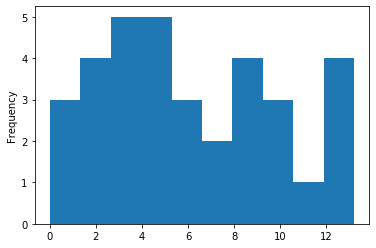

In [58]:
df['Pts_per_g'].plot.hist();

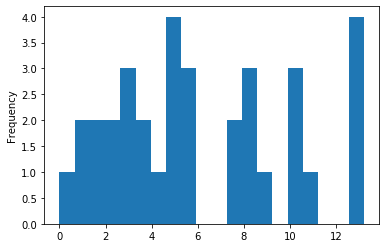

In [59]:
df['Pts_per_g'].plot.hist(bins=20);

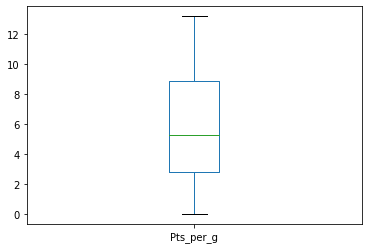

In [60]:
df['Pts_per_g'].plot.box();

# Recommended Reading (& Resources)

- http://docs.python-guide.org/en/latest/scenarios/scrape/
- http://lxml.de/xpathxslt.html
- http://www.w3schools.com/xml/xpath_intro.asp
- http://infohost.nmt.edu/tcc/help/pubs/pylxml/web/index.html

# Appendix: Web Crawling (Collecting data from multiple webpages) - MIS670 

### Example: http://sfbay.craigslist.org/search/npo?s=

In [61]:
a = "http://sfbay.craigslist.org/search/npo?s="
count = 0
for i in range(1,5):
    print('%s%s' %(a,count))
    count = count + 100

http://sfbay.craigslist.org/search/npo?s=0
http://sfbay.craigslist.org/search/npo?s=100
http://sfbay.craigslist.org/search/npo?s=200
http://sfbay.craigslist.org/search/npo?s=300


In [62]:
a = "http://sfbay.craigslist.org/search/npo?s="
count = 0
for i in range(1,3):
    webpage = '%s%s' %(a,count)
    count = count + 100      
    r = requests.get(webpage)
    data = html.fromstring(r.text)
    
    for i in data.xpath("//p[@class='result-info']"):
        title = i.xpath("a/text()")
        url = i.xpath("a/@href")
        print(title, url)

### Example: http://econpy.pythonanywhere.com/ex/001

In [63]:
# creating an empty list (or data storage)
finaldata = []

a = "http://econpy.pythonanywhere.com/ex/00"
count = 1
b = ".html"
for i in range(1,5):
    webpage = '%s%s%s' %(a,count,b)
    count = count + 1      
    r = requests.get(webpage)
    data = html.fromstring(r.text)
    
    for i in data.xpath("//div[@title='buyer-info']"):
        buyers = i.xpath("div[@title='buyer-name']/text()")
        prices = i.xpath("span[@class='item-price']/text()")
        print(buyers, prices)

['Carson Busses'] ['$29.95']
['Earl E. Byrd'] ['$8.37']
['Patty Cakes'] ['$15.26']
['Derri Anne Connecticut'] ['$19.25']
['Moe Dess'] ['$19.25']
['Leda Doggslife'] ['$13.99']
['Dan Druff'] ['$31.57']
['Al Fresco'] ['$8.49']
['Ido Hoe'] ['$14.47']
['Howie Kisses'] ['$15.86']
['Len Lease'] ['$11.11']
['Phil Meup'] ['$15.98']
['Ira Pent'] ['$16.27']
['Ben D. Rules'] ['$7.50']
['Ave Sectomy'] ['$50.85']
['Gary Shattire'] ['$14.26']
['Bobbi Soks'] ['$5.68']
['Sheila Takya'] ['$15.00']
['Rose Tattoo'] ['$114.07']
['Moe Tell'] ['$10.09']
['Les Toil'] ['$19.25']
['Lionel Train'] ['$13.99']
['N.V. Ubble'] ['$8.47']
['Mayflower van Lines'] ['$16.28']
['Chad A. While'] ['$9.60']
['Larry Yet Ann Arbor'] ['$9.49']
['Ted D. Baer'] ['$12.47']
['Etta Burger'] ['$10.99']
['Doris Closed'] ['$10.09']
['Bard Dahl'] ['$21.03']
['Barry Dellive'] ['$16.13']
['Robin Droppings'] ['$17.47']
['Io Ewe'] ['$16.71']
['May Flye'] ['$34.33']
['Alma Gedon'] ['$14.61']
['Hy Marks'] ['$14.67']
['Holly Hox'] ['$9.49']
['

### Example: http://www.basketball-reference.com/draft/BAA_1947.html

In [64]:
# creating an empty list (or data storage)
finaldata = []

a = "http://www.basketball-reference.com/draft/BAA_"
count = 1947
b = ".html"
for i in range(1,5):
    webpage = '%s%s%s' %(a,count,b)
    count = count + 1      
    r = requests.get(webpage)
    data = html.fromstring(r.text)
    
    for i in data.xpath("//tbody/tr"):
        player = i.xpath("td[@data-stat='player']/@csk")
        pts_per_g = i.xpath("td[@data-stat='pts_per_g']/text()")
        print(player, pts_per_g)

['McNeeley'] []
['Selbo'] ['3.2']
['Ehlers'] ['8.1']
['Dropo'] []
['Holub'] ['10.5']
['Crossin'] ['4.7']
['Underman'] []
['Huston'] ['3.6']
["O'Keefe"] ['5.2']
['Killick'] []
[] []
[] []
['Bolyard'] []
['Gainer'] ['1.5']
['Gallatin'] ['13.0']
['Hamilton'] []
['Hampton'] []
['Jake'] []
['Raynor'] []
['Reiser'] ['10.4']
['Rusinko'] []
['Alemeida'] []
['Biasatti'] ['1.0']
['Ezersky'] ['7.6']
['Felt'] []
['Hewson'] ['2.7']
['Kelly'] []
['Petrovick'] []
['Stump'] ['5.3']
['Bishop'] []
['Darden'] ['8.1']
['Decker'] []
['Phillip'] ['9.1']
['Pollard'] ['13.2']
['Schadler'] ['1.5']
['Smith'] ['0.8']
['Stone'] []
['Vance'] ['8.3']
['Duncan'] ['5.5']
['Evans'] []
['Golub'] []
['Head'] []
['Livingston'] []
['Miller'] []
['Misaka'] ['2.3']
['Reichert'] []
['Tomlinson'] []
['Butz'] []
['Kaeding'] []
['Koffenberger'] []
['Pollard'] ['13.2']
['Alamo'] []
['Brown'] []
['Ives'] []
['Knoche'] []
['Nagy'] ['5.1']
['Walton'] []
['Barry'] []
['Furey'] []
['Hubbard'] ['3.6']
['Joyce'] []
['Lipscomb'] []
['Mi